In [37]:
import cv2


In [38]:
import matplotlib.pyplot as plt

In [39]:
config_file='/home/akshyaguna/Downloads/Image_Processing/IP_Project/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='/home/akshyaguna/Downloads/Image_Processing/IP_Project/frozen_inference_graph.pb'

In [48]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [49]:
classLabels=[]#the label names are stored as list
file_name='labels.txt'
with open(file_name,'rt') as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')

In [50]:
print(classLabels)#checking the nabels names

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', '', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [51]:
print(len(classLabels))#checking the length of labels
type(classLabels)

81


list

In [52]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)#scaling
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 0x7f20607ec950>


# --------------------------------Read an image-----------------------------

In [27]:
img=cv2.imread('/home/akshyaguna/Downloads/Image_Processing/IP_Project/images/GnC.jpg')

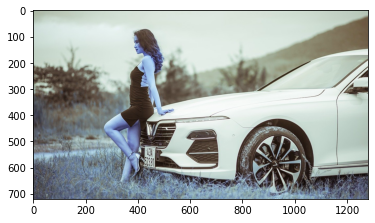

In [28]:
plt.imshow(img)#its a bgr img 

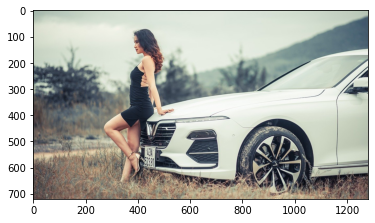

In [29]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [30]:
ClassIndex, confidence, bbox=model.detect(img,confThreshold=0.5)

In [31]:
print(ClassIndex)

[1 3]


In [32]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    #cv2.rectange(frame,(x+y),(xtw,y+h),(255,0,0),2)
    cv2.rectangle(img,boxes,(255,0,0),2) #giving the color of rectangle as blue
    #cv2.putText(img,text,(text_offset_x,text_offset_y),font,fontScale=font_scale,color=(0,0,0),thickness=1)    #
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

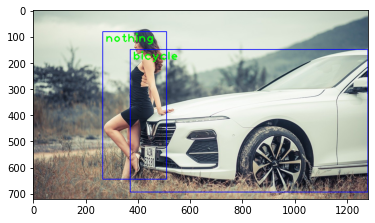

In [33]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

#  ----------------------------------------Video Demo--------------------------------------------------

In [45]:
cap=cv2.VideoCapture(1)#reading the video by webcam as 1 is passed

In [35]:
# while(1):
#     cv2.imshow("img",img)
#     k=cv2.waitKey(33)#returns a -1 value if user doesnot enters anything......
#     if k==27:#giving the ascii value of ESC key so that it takes the k value as 27 and gets out of loop
#         break
#     elif k==-1:
#         continue
#     else:
#         print(k)
# cv2.destroyAllWindows()

In [53]:
#checking if video is opened corretly
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")

font_scale=3
font=cv2.FONT_HERSHEY_PLAIN

def labelsplit(CL):
    for i in range(1-80):
        CL=CL-1
while True:
    ret,frame=cap.read()
    cv2.resize(frame,(224,224))
    
    classIndex, confidence,bbox=model.detect(frame,confThreshold=0.55)
    print(classIndex)
    if(len(classIndex)!=0):
        for ClassInd,conf,boxes in zip(classIndex.flatten(),confidence.flatten(),bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)                
    cv2.imshow('Object Detection',frame)

    if cv2.waitKey(1)& 0xFF ==ord('q'):#ord gives the ascii value of the given character which is matched so that it is q
        break#q reaks the loop and out of loop window is destroyed
cap.release()
cv2.destroyAllWindows()

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[75 75  1]
[1]
[1]
[77]
()
[1]
[53]
[77]
()
()
()
[1]
[1]
[67  1]
[67]
[53  1 67]
[67  1]
[67]
[67]
()
[67]
[67]
()
[67 67 67]
()
[67]
()
[67 73 88]
[73 88]
[73]
[67]
[67 73]
[67 88]
[67 88 86]
[67 88]
[67 88]
[88]
[88 67]
[88 67]
[67 88 73]
[88]
[88]
[88 11]
[11 88]
[11]
[11]
[11]
[11]
[88]
[11]
[11]
[11 88]
[11 88]
[11 88]
[11 88]
[11 88]
[11 88]
[11 88]
[11]
[11]
[11]
[11]
[11]
[11]
[11]
[11]
()
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[18  1]
[ 1 77  1]
[18  1 72  1]
[

[84]
[84]
[84]
[82 84]
[84]
[84]
[82]
()
()
[84]
[82]
()
[84]
()
()
()
()
()
()
()
()
()
()
()
[77]
[77]
()
()
()
()
()
[77]
[77]
[77]
[77]
[77  1]
[77]
[77 73]
[1]
[1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 31]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[72  1]
[77 73  1]
[73  1]
[77  1  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77]
[77  1]
[77  1]
[72  1]
[72  1 72]
[72]
[77]
[77]
[77]
[77]
[77]
[77]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77]
[77]
[77  1